
# Cálculo y Optimización para Data Science

**Objetivo del notebook:**  
Entender de forma intuitiva la **derivada**, los **mínimos/máximos** y el **descenso del gradiente**, y cómo se usan para entrenar modelos de Machine Learning.

## Índice
1. Funciones y pendiente
2. Derivada: qué es y qué significa
3. Mínimos, máximos y puntos críticos
4. Descenso del gradiente en una dimensión
5. Descenso del gradiente aplicado a una regresión lineal muy simple
6. Ejercicios guiados



## 1. Funciones y pendiente

Una **función** es una regla que, a cada número de entrada \(x\), le asigna una salida \(f(x)\).  
Ejemplos:
- \(f(x) = 2x + 3\)
- \(f(x) = x^2\)
- Nota del alumno en función de las horas de estudio.

La **pendiente** nos dice cuánto cambia la salida cuando cambias un poco la entrada.

En una recta \(f(x) = mx + b\), la pendiente es \(m\).  
Si \(m\) es grande, la función crece rápido. Si es negativa, la función decrece.


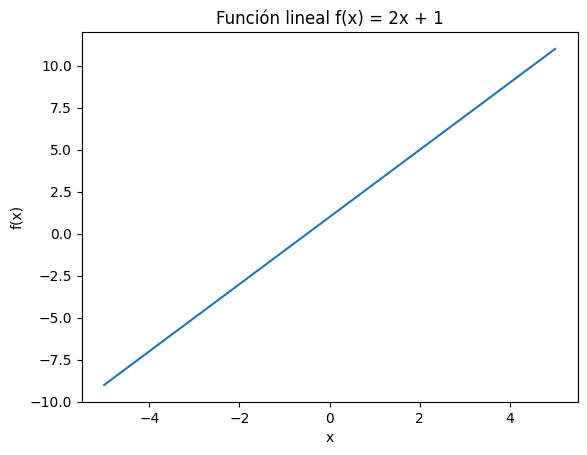

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_lineal(x):
    return 2*x + 1

xs = np.linspace(-5, 5, 100)
ys = f_lineal(xs)

plt.figure()
plt.plot(xs, ys)
plt.title("Función lineal f(x) = 2x + 1")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()


### Ejercicio 1

1. Cambia la función `f_lineal` para que tenga pendiente 0.5 y otra vez -1.
2. Observa cómo cambia la recta en el gráfico.
3. ¿Qué interpretación tiene una pendiente negativa? ¿Y una pequeña en valor absoluto?


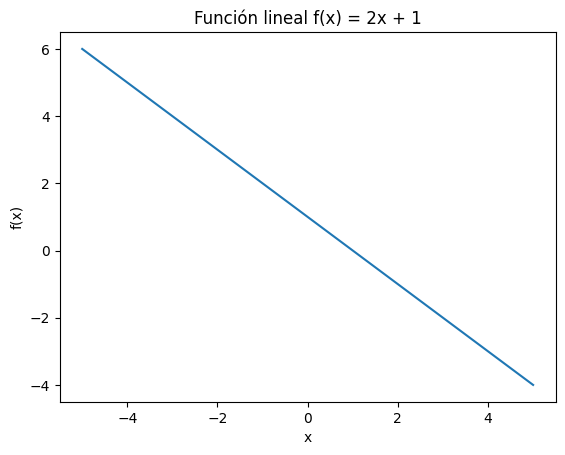

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f_lineal(x):
    return -1*x + 1

xs = np.linspace(-5, 5, 100)
ys = f_lineal(xs)

plt.figure()
plt.plot(xs, ys)
plt.title("Función lineal f(x) = 2x + 1")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()


al tener una pendiente de 2 crece muy rapido

al tener una pendiente de 0.5 crece pero mas lento

al tenre una pendiente de -1 decrece

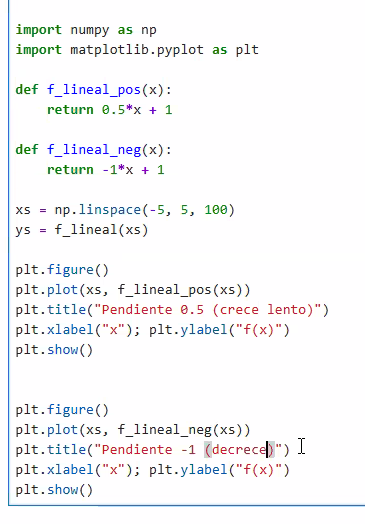


## 2. Derivada: qué es y qué significa

La **derivada** de una función en un punto mide la **pendiente de la función** o tangente en ese punto.  
Intuitivamente: si haces un zoom enorme alrededor de un punto, la curva parece una recta; la derivada es la pendiente de esa recta.


Ejemplo:  
- Para \(f(x) = x^2\), la derivada es \(f'(x) = 2x\).
- En \(x = 1\), la pendiente es 2; en \(x = 0\), la pendiente es 0.

En Data Science, la derivada nos dice **cómo cambia el error** si ajustamos un poco los parámetros de un modelo.


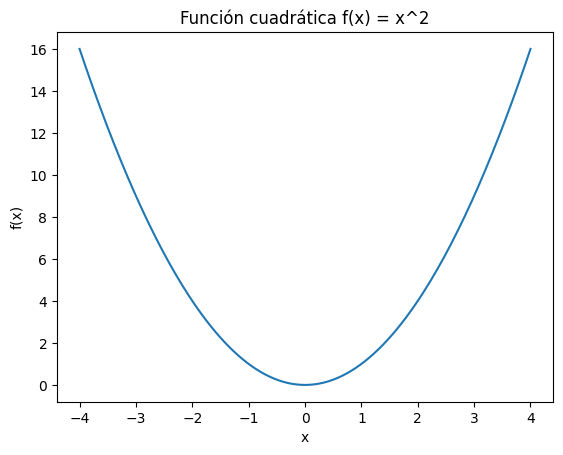

In [7]:

def f_quad(x):
    return x**2

xs = np.linspace(-4, 4, 200)
ys = f_quad(xs)

plt.figure()
plt.plot(xs, ys)
plt.title("Función cuadrática f(x) = x^2")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()



### Ejercicio 2 (conceptual)

1. Mira el gráfico de \(f(x) = x^2\).
2. ¿En qué zona crece la función? ¿En qué zona decrece?
3. En \(x = 0\), la pendiente es 0. ¿Qué tiene de especial ese punto?


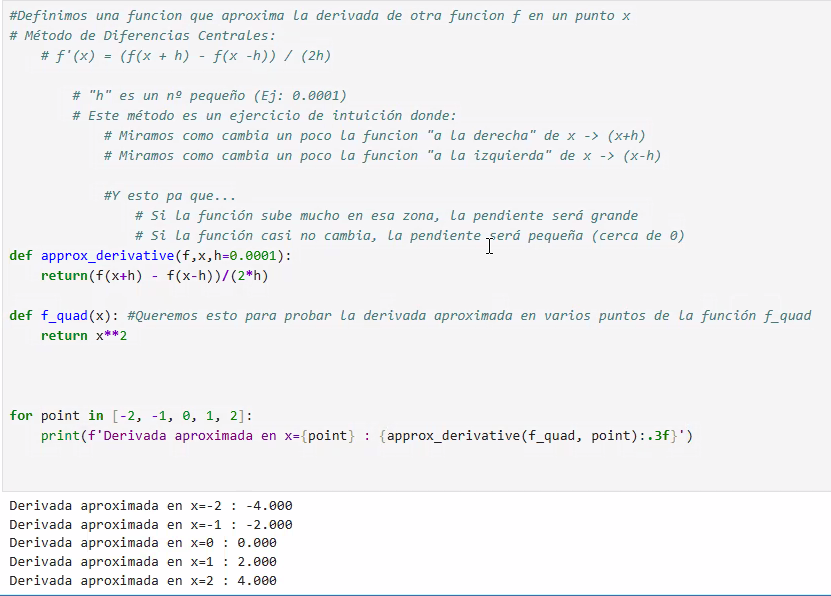

decrece desde de -inf a 0 y crece de 0 a inf

el punto 0 seria por lo que entiendo el lugar mas optimo en el entrenamiento, pues si la derivada de error respecto a un parametro es 0 es que el modelo ha llegado a "la solucion mas optima" justo lo que se explica abajo


## 3. Mínimos, máximos y puntos críticos

Un **mínimo local** es un punto donde la función es más baja que en sus alrededores.  
Un **máximo local** es lo contrario.

En un mínimo o máximo (punto crítico) suele cumplirse:
\[
f'(x) = 0
\]

Para \(f(x) = x^2\):
- \(f'(x) = 2x\)
- El punto crítico es en \(x = 0\), que es un mínimo.

En ML, buscamos a menudo el **mínimo** de una función de error (loss).



## 4. Descenso del gradiente en una dimensión

La idea del **descenso del gradiente** es muy intuitiva:

1. Empiezas en un valor inicial del parámetro (por ejemplo, \(w\)).
2. Calculas la derivada en ese punto: te dice hacia dónde crece la función.
3. Das un paso en la dirección contraria a la derivada para bajar la función.
4. Repites hasta que llegues cerca de un mínimo.

Regla básica en 1D:
\[
w_{\text{nuevo}} = w_{\text{viejo}} - \eta \cdot f'(w_{\text{viejo}})
\]
donde \(\eta\) es la tasa de aprendizaje (learning rate).


Valor aproximado de w en el mínimo: 2.9989366176033725


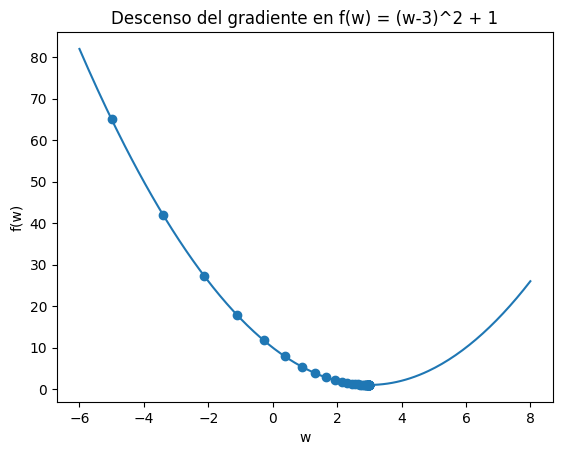

In [8]:

# Función con mínimo en w = 3
def f(w):
    return (w - 3)**2 + 1

def df(w):
    return 2*(w - 3)

w = -5.0
lr = 0.1
hist_w = []
hist_f = []

for i in range(40):
    hist_w.append(w)
    hist_f.append(f(w))
    w = w - lr * df(w)

print("Valor aproximado de w en el mínimo:", w)

# Visualizar la trayectoria del descenso
ws_plot = np.linspace(-6, 8, 200)
fs_plot = f(ws_plot)

plt.figure()
plt.plot(ws_plot, fs_plot)
plt.scatter(hist_w, [f(v) for v in hist_w])
plt.title("Descenso del gradiente en f(w) = (w-3)^2 + 1")
plt.xlabel("w"); plt.ylabel("f(w)")
plt.show()



### Ejercicio 3

1. Cambia el `lr` (learning rate) a valores como `0.01`, `0.5`, `1.5`.
2. Observa qué pasa con la convergencia.
   - Si es muy pequeño, el descenso será lento.
   - Si es muy grande, puede que "salte" alrededor del mínimo.

Piensa: ¿por qué escoger un buen `lr` es tan importante en entrenamiento de redes neuronales?
Escoger un buen lr es crucial porque garantiza el equilibrio entre la rapidez de la convergencia y la estabilidad del proceso de optimización, es decir, que no vaya muy lento por si no llega al 0 y que no vaya demasiado rapido para no pasarse de parada

Valor aproximado de w en el mínimo: 2.8817529364685233


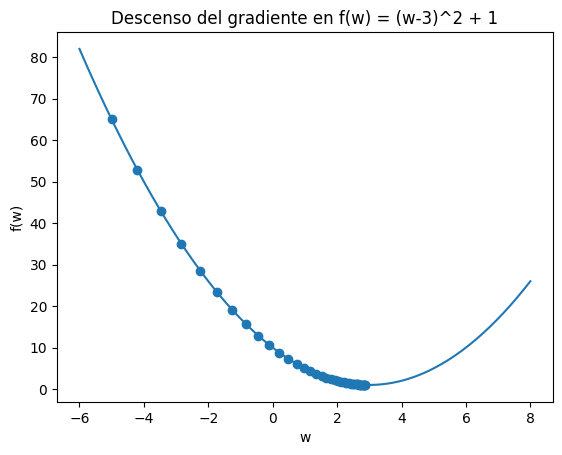

In [18]:

# Función con mínimo en w = 3
def f(w):
    return (w - 3)**2 + 1

def df(w):
    return 2*(w - 3)

w = -5.0
lr = 0.05
hist_w = []
hist_f = []

for i in range(40):
    hist_w.append(w)
    hist_f.append(f(w))
    w = w - lr * df(w)

print("Valor aproximado de w en el mínimo:", w)

# Visualizar la trayectoria del descenso
ws_plot = np.linspace(-6, 8, 200)
fs_plot = f(ws_plot)

plt.figure()
plt.plot(ws_plot, fs_plot)
plt.scatter(hist_w, [f(v) for v in hist_w])
plt.title("Descenso del gradiente en f(w) = (w-3)^2 + 1")
plt.xlabel("w"); plt.ylabel("f(w)")
plt.show()


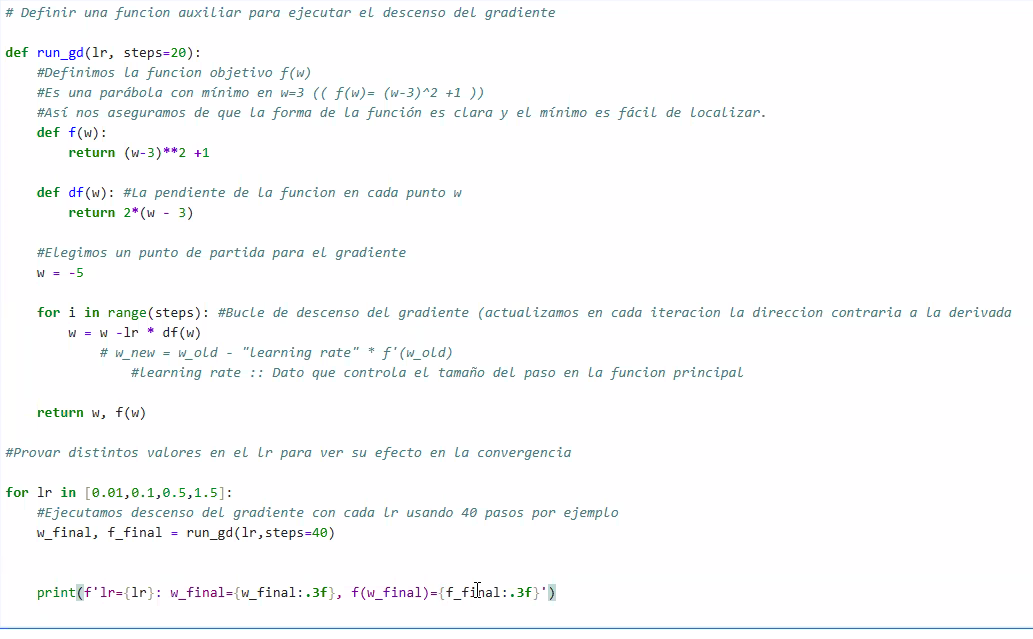


## 5. Descenso del gradiente en una regresión lineal simple

Ahora aplicamos la misma idea para ajustar una recta a unos datos.  
Supón que tenemos puntos \((x_i, y_i)\) y un modelo:

\[
\hat{y} = a x + b
\]

La función de error que queremos minimizar es el **Error Cuadrático Medio (MSE)**:

\[
\text{MSE}(a, b) = \frac{1}{N} \sum_{i=1}^N (y_i - (a x_i + b))^2
\]

Podemos calcular derivadas respecto a \(a\) y \(b\) y aplicar descenso del gradiente.


Valores encontrados: a≈2.227, b≈0.131
Valores verdaderos: a=2.0, b=1.0
MSE final: 2.853850949035518


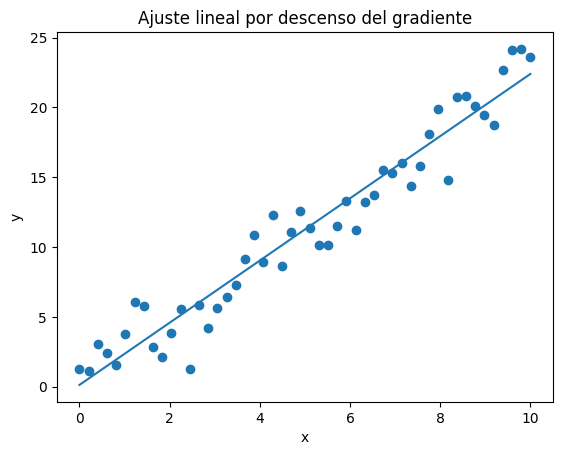

In [19]:

# Datos sintéticos
rng = np.random.default_rng(0)
x = np.linspace(0, 10, 50)
true_a, true_b = 2.0, 1.0
y = true_a * x + true_b + rng.normal(0, 2.0, size=x.size)

def mse(a, b):
    y_hat = a*x + b
    return np.mean((y - y_hat)**2)

def grad_mse(a, b):
    y_hat = a*x + b
    da = (-2/len(x)) * np.sum(x * (y - y_hat))
    db = (-2/len(x)) * np.sum(     (y - y_hat))
    return da, db

a, b = -1.0, 5.0
lr = 0.01
for _ in range(1000):
    da, db = grad_mse(a, b)
    a -= lr * da
    b -= lr * db

print(f"Valores encontrados: a≈{a:.3f}, b≈{b:.3f}")
print(f"Valores verdaderos: a={true_a}, b={true_b}")
print("MSE final:", mse(a, b))

plt.figure()
plt.scatter(x, y)
plt.plot(x, a*x + b)
plt.title("Ajuste lineal por descenso del gradiente")
plt.xlabel("x"); plt.ylabel("y")
plt.show()



### Ejercicio 4

1. Cambia los valores iniciales de `a` y `b`.
2. Cambia el `lr` y observa cómo afecta al resultado.
3. Prueba a reducir el número de iteraciones (por ejemplo a 100) y mira si el modelo converge bien.

Piensa: en problemas reales, solemos tener muchos parámetros (miles o millones). El principio sigue siendo el mismo.

---

Con esto tienes la base conceptual de cálculo y optimización aplicada a Data Science.


Valores encontrados: a≈1.893, b≈1.607
Valores verdaderos: a=1.0, b=2.0
MSE final: 21.196386837789014


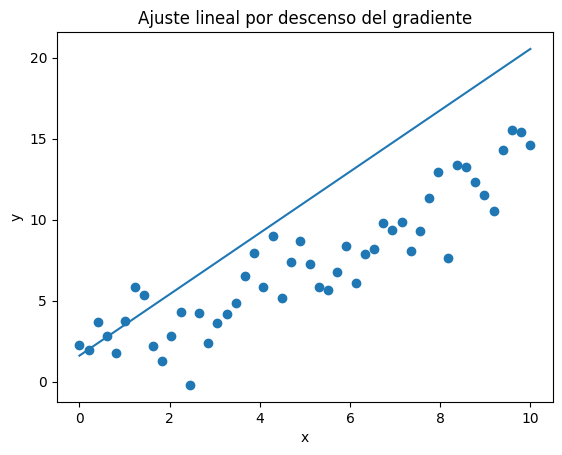

In [38]:

# Datos sintéticos
rng = np.random.default_rng(0)
x = np.linspace(0, 10, 50)
true_a, true_b = 1.0, 2.0
y = true_a * x + true_b + rng.normal(0, 2.0, size=x.size)

def mse(a, b):
    y_hat = a*x + b
    return np.mean((y - y_hat)**2)

def grad_mse(a, b):
    y_hat = a*x + b
    da = (-2/len(x)) * np.sum(x * (y - y_hat))
    db = (-2/len(x)) * np.sum(     (y - y_hat))
    return da, db

a, b = 2.0, 3.0
lr = 0.029
for _ in range(100):
    da, db = grad_mse(a, b)
    a -= lr * da
    b -= lr * db

print(f"Valores encontrados: a≈{a:.3f}, b≈{b:.3f}")
print(f"Valores verdaderos: a={true_a}, b={true_b}")
print("MSE final:", mse(a, b))

plt.figure()
plt.scatter(x, y)
plt.plot(x, a*x + b)
plt.title("Ajuste lineal por descenso del gradiente")
plt.xlabel("x"); plt.ylabel("y")
plt.show()


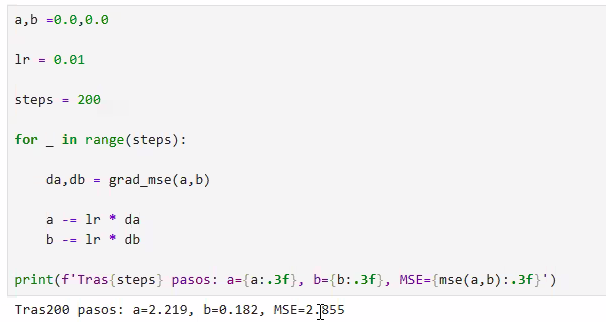